<a href="https://colab.research.google.com/github/napsterrisen/boom/blob/main/Digits_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine Assignment





-----------





### Description  [ load_digits ]

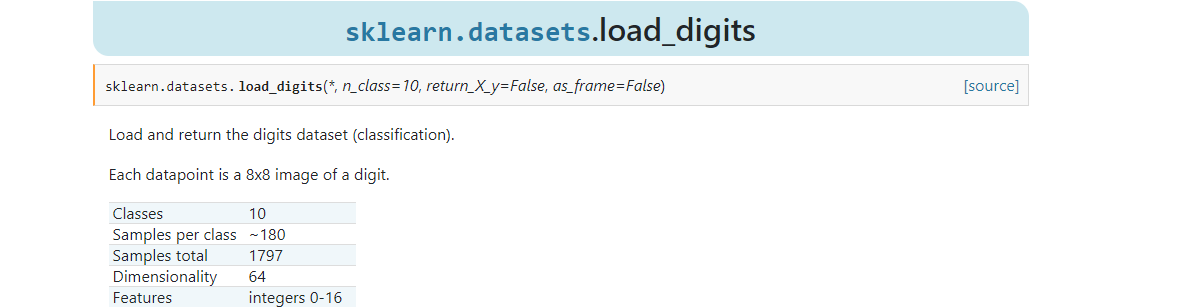

#### Reading the data from built-in datasets using sklearn module

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

In [381]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [382]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [383]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

__________________________________________________

##  Scaling the data by using StandardScaler for Dimensionality Reduction

In [384]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dan=sc.fit_transform(digits.data)

In [385]:
dan

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

___________________________

## PCA Analysis

In [386]:
from sklearn.decomposition import PCA

In [387]:
#cov = red.cov()
#eig_val, eig_vec=np.linalg.eig(cov)

In [393]:
pca=PCA(n_components=.95)
ming=pca.fit_transform(dan)
cumsum=np.cumsum(pca.explained_variance_ratio_)
np.argmax(cumsum>=0.95)+1

40

In [394]:
black=pd.DataFrame(ming)

In [395]:
black.shape

(1797, 40)

In [434]:
#black['target']=digits.target
black

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,-0.499693,-0.789466,0.228125,-0.195142,0.837040,0.104341,0.185323,-0.090057,0.412754,0.430517,0.450994,0.558703,0.508826,-0.758896,-0.464500,0.732176,0.327318,0.157022,0.404918,-0.324594,0.534683,-0.017979,0.047950,0.019124,0.117190,0.709049,0.082410,0.814059,0.024931,0.321931
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,-0.505000,0.641593,-0.048361,-0.392054,-0.744412,-0.214072,-0.101727,-0.422000,0.553085,-0.069676,0.909818,-0.242434,-0.478472,0.491158,0.790504,0.067788,-1.525555,-0.742482,-0.855856,-0.277084,1.098196,-1.144159,0.037744,0.371680,-0.671299,-0.004144,-0.246765,0.200261,0.087108,-0.489143
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,2.196453,-2.310276,-0.566874,-0.995772,-1.170505,0.399017,-0.240298,-0.465223,-1.065556,-1.133454,-0.525917,0.069262,-1.276142,-0.389437,-0.407580,-0.121614,0.373418,0.205099,-0.362138,1.181186,-0.749792,0.487304,-1.356959,-0.107016,0.149503,-0.089290,0.408216,-0.214596,-1.278875,0.545834
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,-1.065129,0.491755,-0.166579,1.008790,-0.141893,-1.000781,-0.950687,-0.400034,1.490825,0.308128,0.560421,-0.167976,0.573332,-0.532997,-0.084318,-0.466793,0.154232,-0.403244,0.291934,-1.244539,0.268599,0.875580,0.117581,-0.470575,-0.148854,0.234044,0.396726,0.197436,0.772751,-0.050325
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,-1.017440,-1.365994,-0.343716,-0.113469,0.732635,0.210692,-0.094411,-0.552371,1.613976,1.086368,0.495644,-0.185698,0.960864,-0.184642,0.563999,-2.142481,0.064456,0.746668,1.076306,0.297665,-0.660454,-0.360253,0.268121,0.499444,-0.263106,-0.583008,-0.174328,-0.215579,-0.133426,0.184994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255024,-3.765861,-1.947006,-0.190094,-0.555760,0.531222,0.476475,1.152430,-0.473054,-0.635879,0.803622,1.205195,-0.700724,0.187246,0.161669,0.504438,0.357642,-0.956725,0.816109,0.030250,-0.783514,-0.676671,-0.042743,-0.359572,-0.066849,0.203868,0.058615,0.979933,-0.122796,-0.430137,-0.515627,-0.311117,0.421468,0.392554,0.420797,0.541567,-0.024422,-0.756333,-0.285562
1793,2.423234,-1.429611,-3.045245,2.632089,-0.822902,0.004061,-1.106872,2.330903,0.569455,-1.654173,-0.460155,-0.530551,0.858305,0.885069,-0.702222,1.098425,0.301699,-0.311522,-0.307535,0.110083,-0.957759,-0.041950,0.379564,0.082078,0.213136,-0.864603,0.272784,-0.567033,-0.769823,-0.008326,-0.047497,-0.131434,-0.194507,0.054860,-0.169494,-0.023170,-0.162096,-0.506573,-0.061084,-0.404112
1794,1.022596,-0.147911,2.469974,-0.620307,-0.972043,-0.007377,0.381115,0.529064,2.054709,-2.036838,-0.679554,0.396803,-0.409313,0.257614,0.334953,1.162071,1.124031,0.669245,-1.612100,0.182303,0.166667,-0.237439,0.041549,0.235181,-0.261485,-1.340361,-0.054225,-0.352066,0.521824,-0.271170,-0.947936,-0.152536,0.050913,0.595505,1.019822,0.134728,-0.543296,0.601365,0.412388,1.208864
1795,1.076055,-0.380906,-2.455487,-1.312013,0.253533,-0.638322,1.034470,0.763325,1.077474,-0.334527,-0.980131,0.606451,0.169573,-0.759176,0.014572,0.158465,1.686638,0.811822,-1.769181,0.774718,-0.135668,-0.433929,1.111662,0.312411,-0.940159,1.152000,-0.662983,0.979041,0.293561,-0.711736,0.176904,-0.446737,-0.468408,0.160652,-0.771848,0.576100,0.429805,0.437566,-0.698635,-0.443400


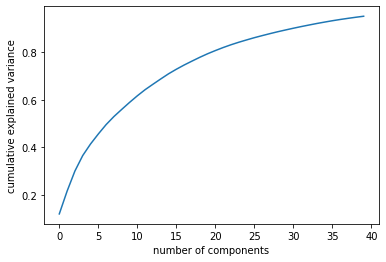

In [433]:
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

__________________________________________________

## Training the model Using Support Vector Machine (SVM)

In [398]:
from sklearn.model_selection import train_test_split

In [399]:
X = black.values
y = df.target.values
X.shape

(1797, 40)

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [423]:
len(X_train)

1257

In [424]:
len(X_test)

540

In [425]:
from sklearn.svm import SVC
model = SVC()

In [426]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [427]:
pre=model.predict(X_test)
pre.shape

(540,)

In [428]:
y_test.shape

(540,)

In [429]:
model.score(X_test,y_test)

0.9814814814814815

In [430]:
from sklearn.metrics import accuracy_score,r2_score,classification_report
accuracy_score(y_test,pre)

0.9814814814814815

In [431]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        62
           2       0.98      1.00      0.99        55
           3       0.98      0.96      0.97        57
           4       0.94      0.98      0.96        52
           5       1.00      0.96      0.98        57
           6       0.98      1.00      0.99        54
           7       1.00      1.00      1.00        55
           8       0.96      0.96      0.96        54
           9       0.97      0.95      0.96        39

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [432]:
r2_score(y_test,pre)

0.9641663804140774

**Tune parameters**

**1. Regularization (C)**

In [351]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9851851851851852

In [352]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9907407407407407

**2. Gamma**

In [353]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.07962962962962963

**3. Kernel**

In [354]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [355]:
model_linear_kernal.score(X_test, y_test)

0.9703703703703703

**Exercise**

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size
